In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from math import log10
from scipy import stats
import matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from mongodata import mongodata
mongodata=mongodata.TAAPI(username='potsdam',password='sensors')

In [2]:
data=mongodata.concat(7007,7006,20001,startTime='2021-07-01 12:00:00',endTime='2021-07-01 12:45:00')
data=mongodata.resample_concat(data,windowSize=60)

__________________________________________________________________________________________
 
All sensors are online!
 
3 devices returned
__________________________________________________________________________________________


In [3]:
data=mongodata.resample_concat(data,windowSize=60)

In [4]:
df07=data[data['device_id']==7007]
df06=data[data['device_id']==7006]
df01=data[data['device_id']==20001]

In [6]:
print(round(df07['pn03_t'].mean()/df06['pn03_t'].mean(),2),
      round(df07['pn10_t'].mean()/df06['pn10_t'].mean(),2),
      round(df07['pn50_t'].mean()/df06['pn50_t'].mean(),2))

print(round(df07['pn03_b'].mean()/df06['pn03_b'].mean(),2),
      round(df07['pn10_b'].mean()/df06['pn10_b'].mean(),2),
      round(df07['pn50_b'].mean()/df06['pn50_b'].mean(),2))


print(round(df07['pn03_t'].mean()/df01['pn03_t'].mean(),2),
      round(df07['pn10_t'].mean()/df01['pn10_t'].mean(),2),
      round(df07['pn50_t'].mean()/df01['pn50_t'].mean(),2))

print(round(df07['pn03_b'].mean()/df01['pn03_b'].mean(),2),
      round(df07['pn10_b'].mean()/df01['pn10_b'].mean(),2),
      round(df07['pn50_b'].mean()/df01['pn50_b'].mean(),2))

0.94 1.19 1.86
0.85 1.18 2.12
0.62 0.83 3.25
1.6 1.87 4.86


In [7]:
pn03t_06=0.94
pn10t_06=1.19
pn50t_06=1.86
pn03b_06=0.85
pn10b_06=1.18
pn50b_06=2.12

pn03t_01=0.62
pn10t_01=0.83
pn50t_01=3.25
pn03b_01=1.6
pn10b_01=1.87
pn50b_01=4.86

In [8]:
df06['pn03_t']=df06['pn03_t']*pn03t_06
df06['pn10_t']=df06['pn10_t']*pn10t_06
df06['pn50_t']=df06['pn50_t']*pn50t_06
df06['pn03_b']=df06['pn03_b']*pn03b_06
df06['pn10_b']=df06['pn10_b']*pn10b_06
df06['pn50_b']=df06['pn50_b']*pn50b_06

df01['pn03_t']=df01['pn03_t']*pn03t_01
df01['pn10_t']=df01['pn10_t']*pn10t_01
df01['pn50_t']=df01['pn50_t']*pn50t_01
df01['pn03_b']=df01['pn03_b']*pn03b_01
df01['pn10_b']=df01['pn10_b']*pn10b_01
df01['pn50_b']=df01['pn50_b']*pn50b_01

In [9]:
data=pd.concat([df07,df06,df01])

zone=2
df=data.copy()

df['mpn03um'] = np.where((df['pn03_t'] < zone*df['pn03_b']) & (df['pn03_b'] < zone*df['pn03_t']),
                                 (df['pn03_t']+df['pn03_b'])/2, (df[['pn03_t', 'pn03_b']]).min(axis=1))

df['mpn10um'] = np.where((df['pn10_t'] < zone*df['pn10_b']) & (df['pn10_b'] < zone*df['pn10_t']),
                                 (df['pn10_t']+df['pn10_b'])/2, (df[['pn10_t', 'pn10_b']]).min(axis=1))

df['mpn50um'] = np.where((df['pn50_t'] < zone*df['pn50_b']) & (df['pn50_b'] < zone*df['pn50_t']),
                                 (df['pn50_t']+df['pn50_b'])/2, (df[['pn50_t', 'pn50_b']]).min(axis=1))

df['small'] = df['mpn03um'] - df['mpn10um']
df['medium']= df['mpn10um']- df['mpn50um']
df['large']= df['mpn50um']
data=df.copy()


data['sr']=data['pn03_t']/data['pn03_b']
data['mr']=data['pn10_t']/data['pn10_b']
data['lr']=data['pn50_t']/data['pn50_b']
df07=data[data['device_id']==7007]
df06=data[data['device_id']==7006]
df01=data[data['device_id']==20001]

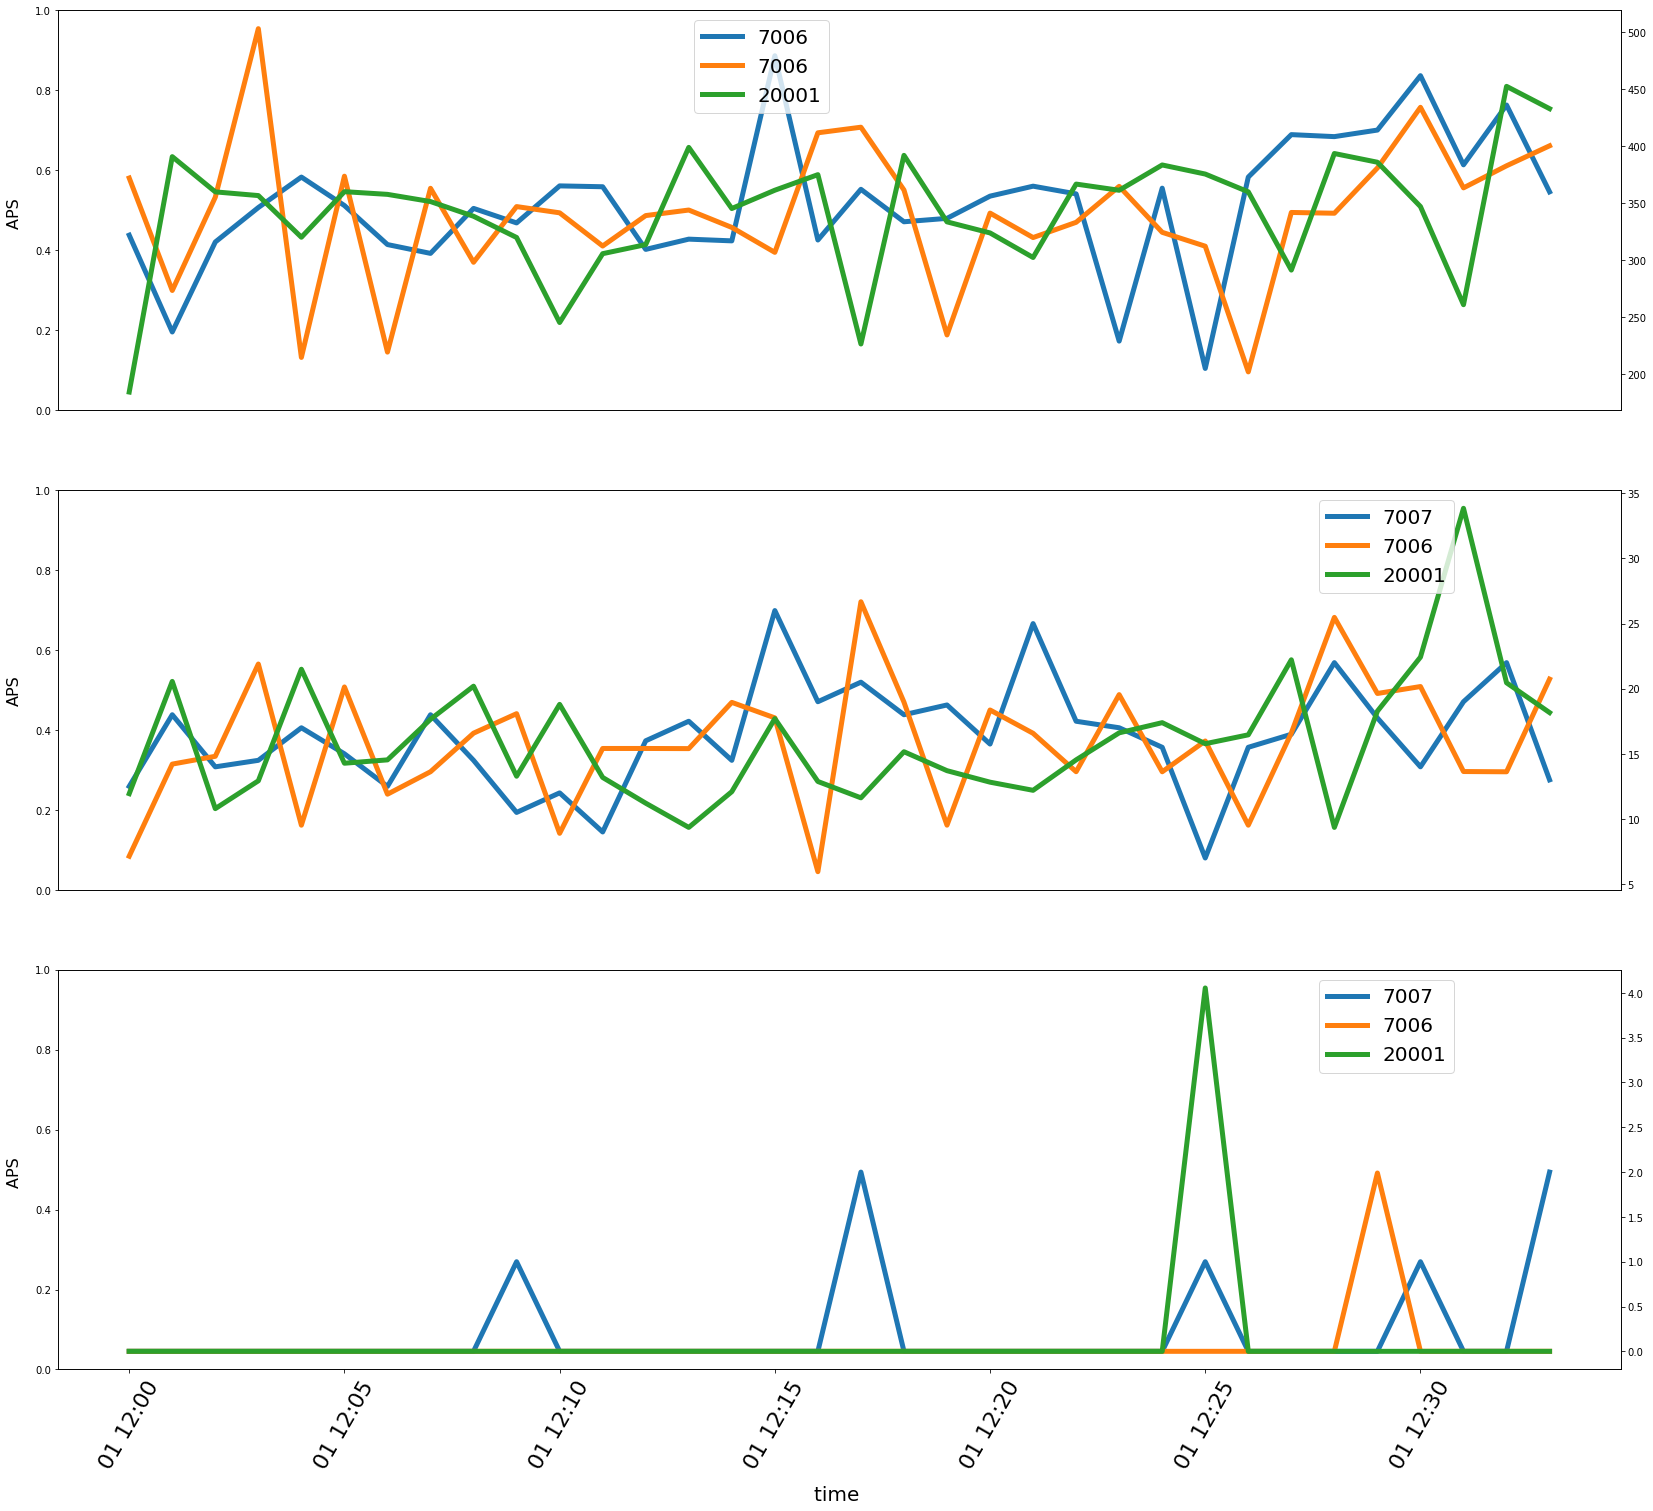

In [10]:

fig = plt.figure( figsize=(28, 25))

ax3 = fig.add_subplot(313)
ax1 = fig.add_subplot(311, sharex =ax3)
ax2 = fig.add_subplot(312, sharex =ax3)

ax1t = ax1.twinx()
ax2t = ax2.twinx()
ax3t = ax3.twinx()




ax1t.plot(df07.Date, df07['small'], linewidth=5, label='7006')
ax1t.plot(df06.Date, df06['small'], linewidth=5, label='7006')
ax1t.plot(df01.Date, df01['small'], linewidth=5, label='20001')

ax2t.plot(df07.Date, df07['medium'], linewidth=5, label='7007')
ax2t.plot(df06.Date, df06['medium'], linewidth=5, label='7006')
ax2t.plot(df01.Date, df01['medium'], linewidth=5, label='20001')

ax3t.plot(df07.Date, df07['large'], linewidth=5, label='7007')
ax3t.plot(df06.Date, df06['large'], linewidth=5, label='7006')
ax3t.plot(df01.Date, df01['large'], linewidth=5, label='20001')




x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)



ax3.set_xlabel('time ',color='k',fontsize=20,labelpad=13)
ax1.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('APS',color='k',fontsize=16,labelpad=13)
ax3.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(60)
    label.set_fontsize(22)
    
ax1t.legend(bbox_to_anchor=(0.5, 1),loc='upper right', ncol=1, fontsize=20)
ax2t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
ax3t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)



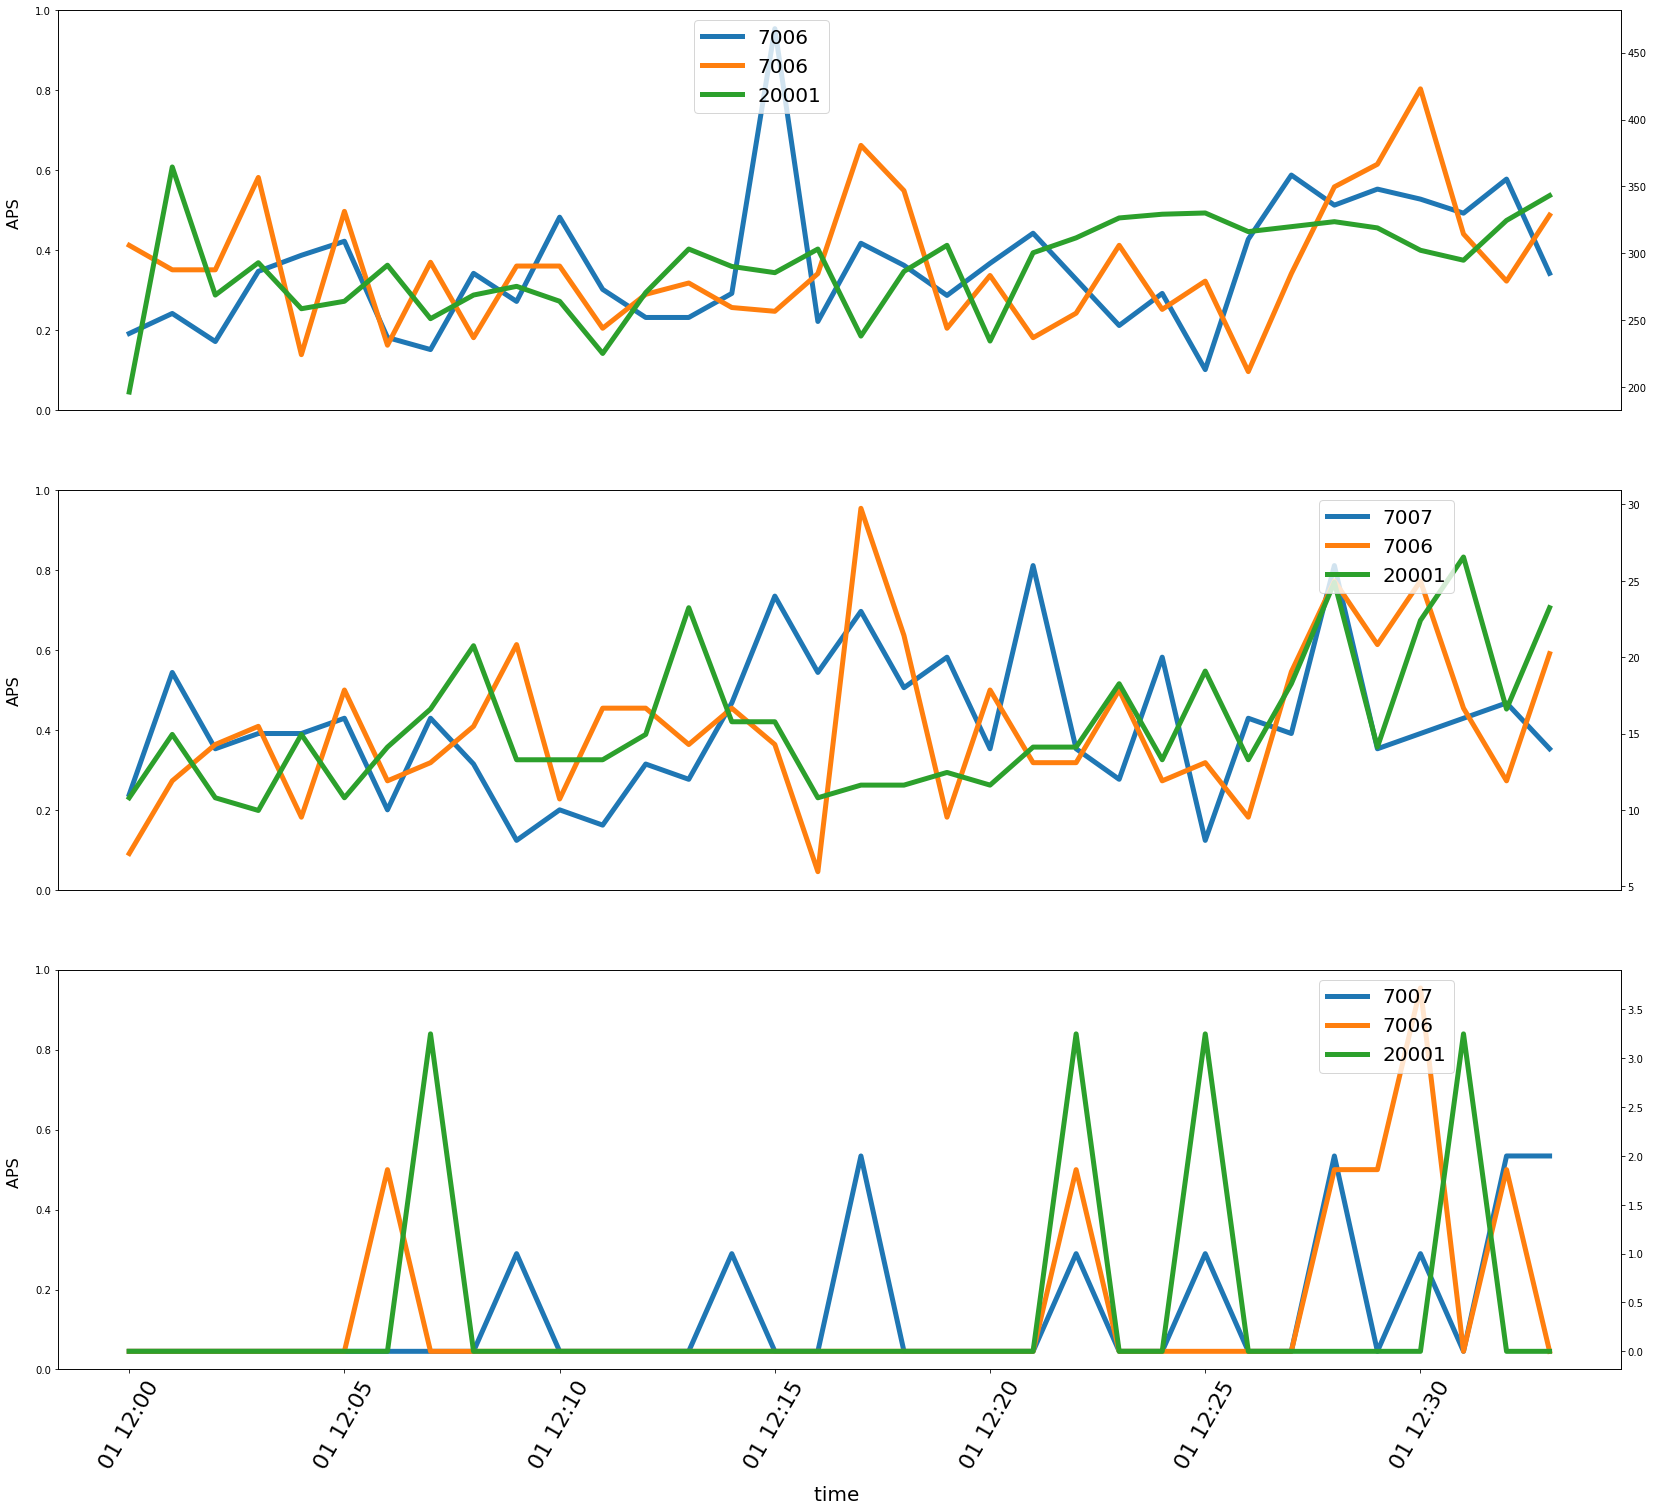

In [11]:

fig = plt.figure( figsize=(28, 25))

ax3 = fig.add_subplot(313)
ax1 = fig.add_subplot(311, sharex =ax3)
ax2 = fig.add_subplot(312, sharex =ax3)

ax1t = ax1.twinx()
ax2t = ax2.twinx()
ax3t = ax3.twinx()




ax1t.plot(df07.Date, df07['pn03_t'], linewidth=5, label='7006')
ax1t.plot(df06.Date, df06['pn03_t'], linewidth=5, label='7006')
ax1t.plot(df01.Date, df01['pn03_t'], linewidth=5, label='20001')

ax2t.plot(df07.Date, df07['pn10_t'], linewidth=5, label='7007')
ax2t.plot(df06.Date, df06['pn10_t'], linewidth=5, label='7006')
ax2t.plot(df01.Date, df01['pn10_t'], linewidth=5, label='20001')

ax3t.plot(df07.Date, df07['pn50_t'], linewidth=5, label='7007')
ax3t.plot(df06.Date, df06['pn50_t'], linewidth=5, label='7006')
ax3t.plot(df01.Date, df01['pn50_t'], linewidth=5, label='20001')




x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)



ax3.set_xlabel('time ',color='k',fontsize=20,labelpad=13)
ax1.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('APS',color='k',fontsize=16,labelpad=13)
ax3.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(60)
    label.set_fontsize(22)
    
ax1t.legend(bbox_to_anchor=(0.5, 1),loc='upper right', ncol=1, fontsize=20)
ax2t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
ax3t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)




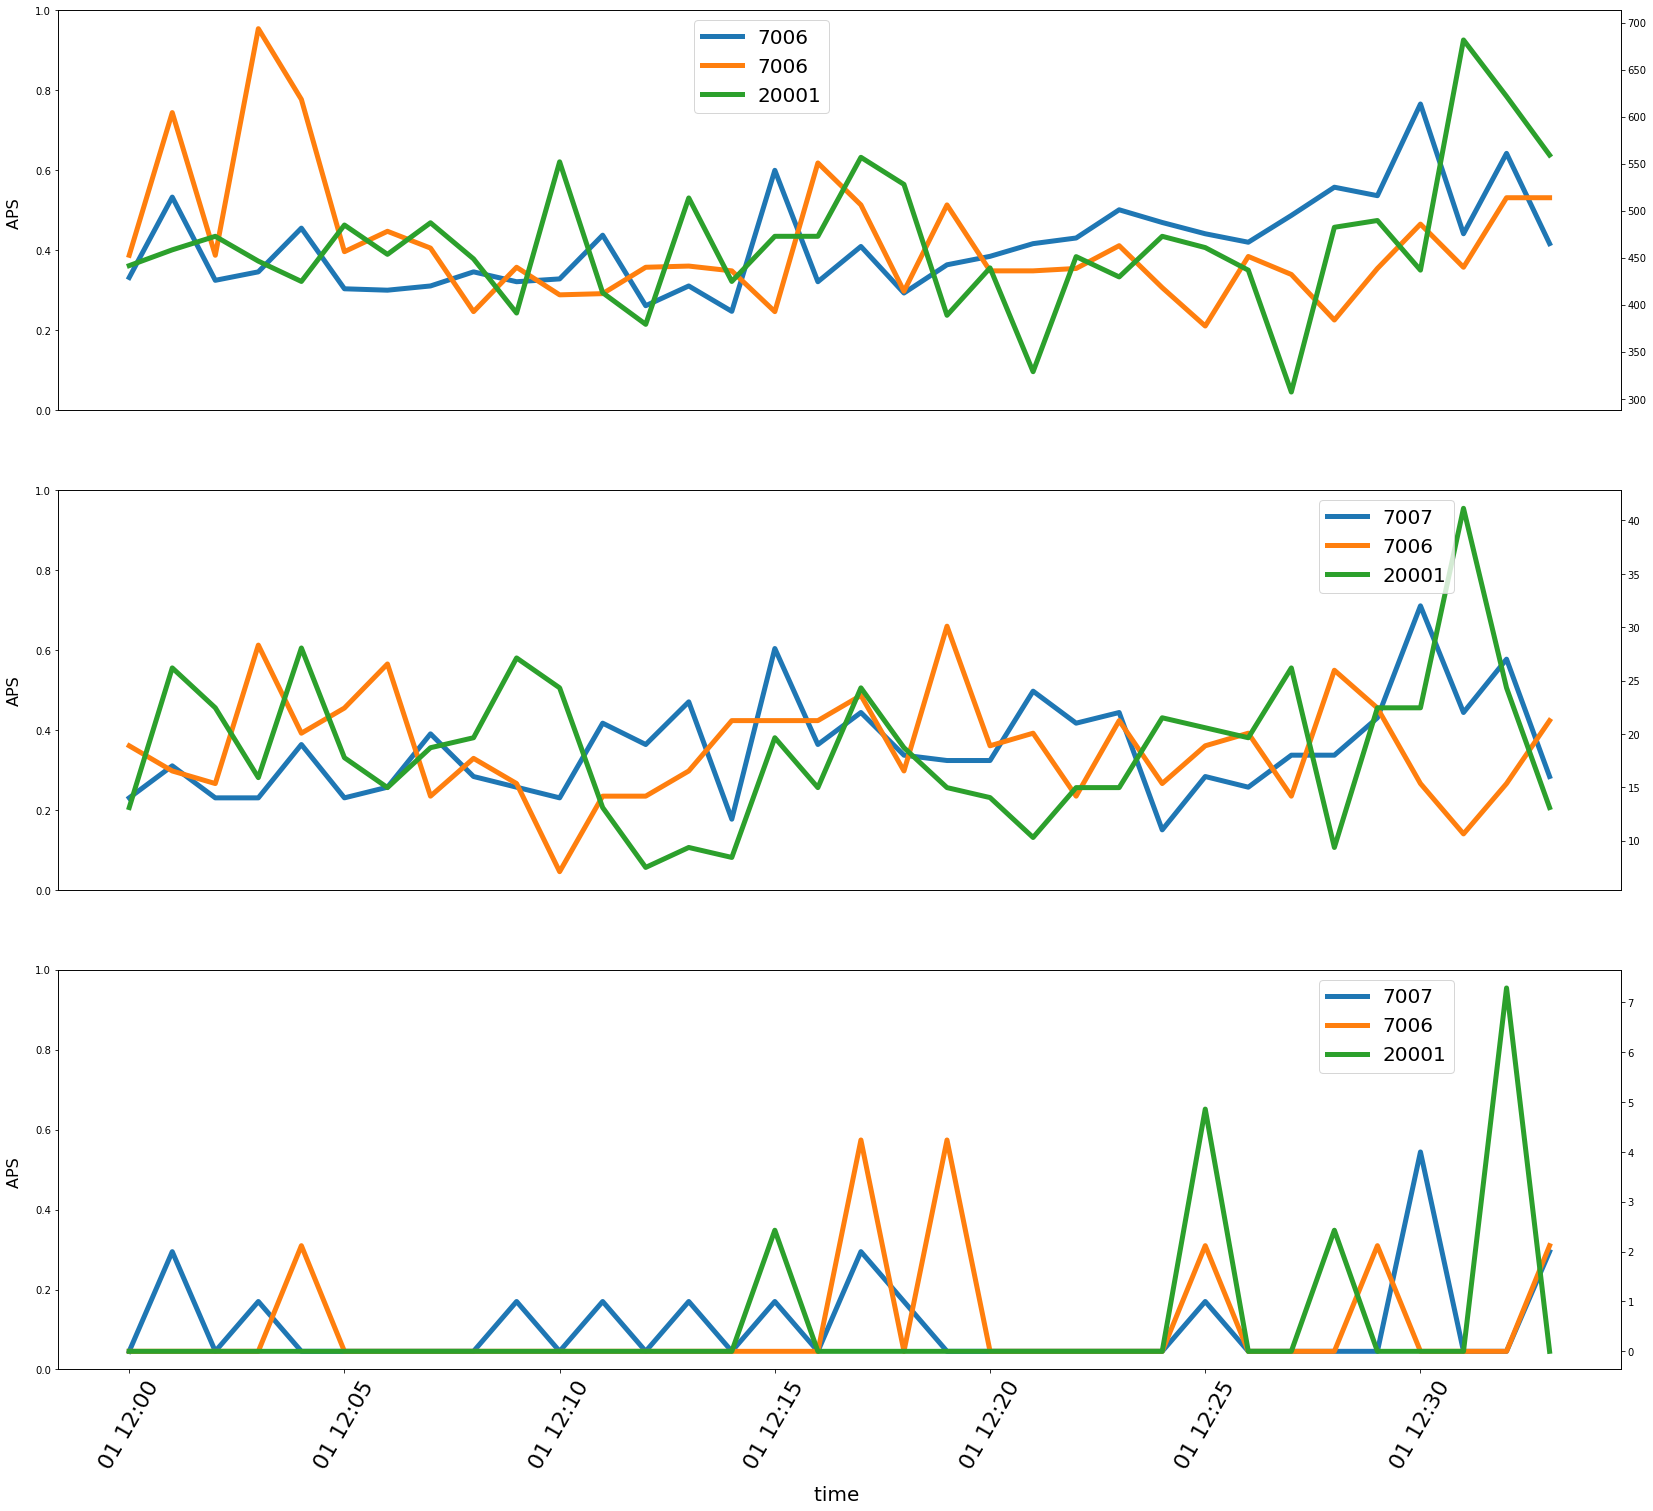

In [12]:

fig = plt.figure( figsize=(28, 25))

ax3 = fig.add_subplot(313)
ax1 = fig.add_subplot(311, sharex =ax3)
ax2 = fig.add_subplot(312, sharex =ax3)

ax1t = ax1.twinx()
ax2t = ax2.twinx()
ax3t = ax3.twinx()




ax1t.plot(df07.Date, df07['pn03_b'], linewidth=5, label='7006')
ax1t.plot(df06.Date, df06['pn03_b'], linewidth=5, label='7006')
ax1t.plot(df01.Date, df01['pn03_b'], linewidth=5, label='20001')

ax2t.plot(df07.Date, df07['pn10_b'], linewidth=5, label='7007')
ax2t.plot(df06.Date, df06['pn10_b'], linewidth=5, label='7006')
ax2t.plot(df01.Date, df01['pn10_b'], linewidth=5, label='20001')

ax3t.plot(df07.Date, df07['pn50_b'], linewidth=5, label='7007')
ax3t.plot(df06.Date, df06['pn50_b'], linewidth=5, label='7006')
ax3t.plot(df01.Date, df01['pn50_b'], linewidth=5, label='20001')




x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)



ax3.set_xlabel('time ',color='k',fontsize=20,labelpad=13)
ax1.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('APS',color='k',fontsize=16,labelpad=13)
ax3.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(60)
    label.set_fontsize(22)
    
ax1t.legend(bbox_to_anchor=(0.5, 1),loc='upper right', ncol=1, fontsize=20)
ax2t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
ax3t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)





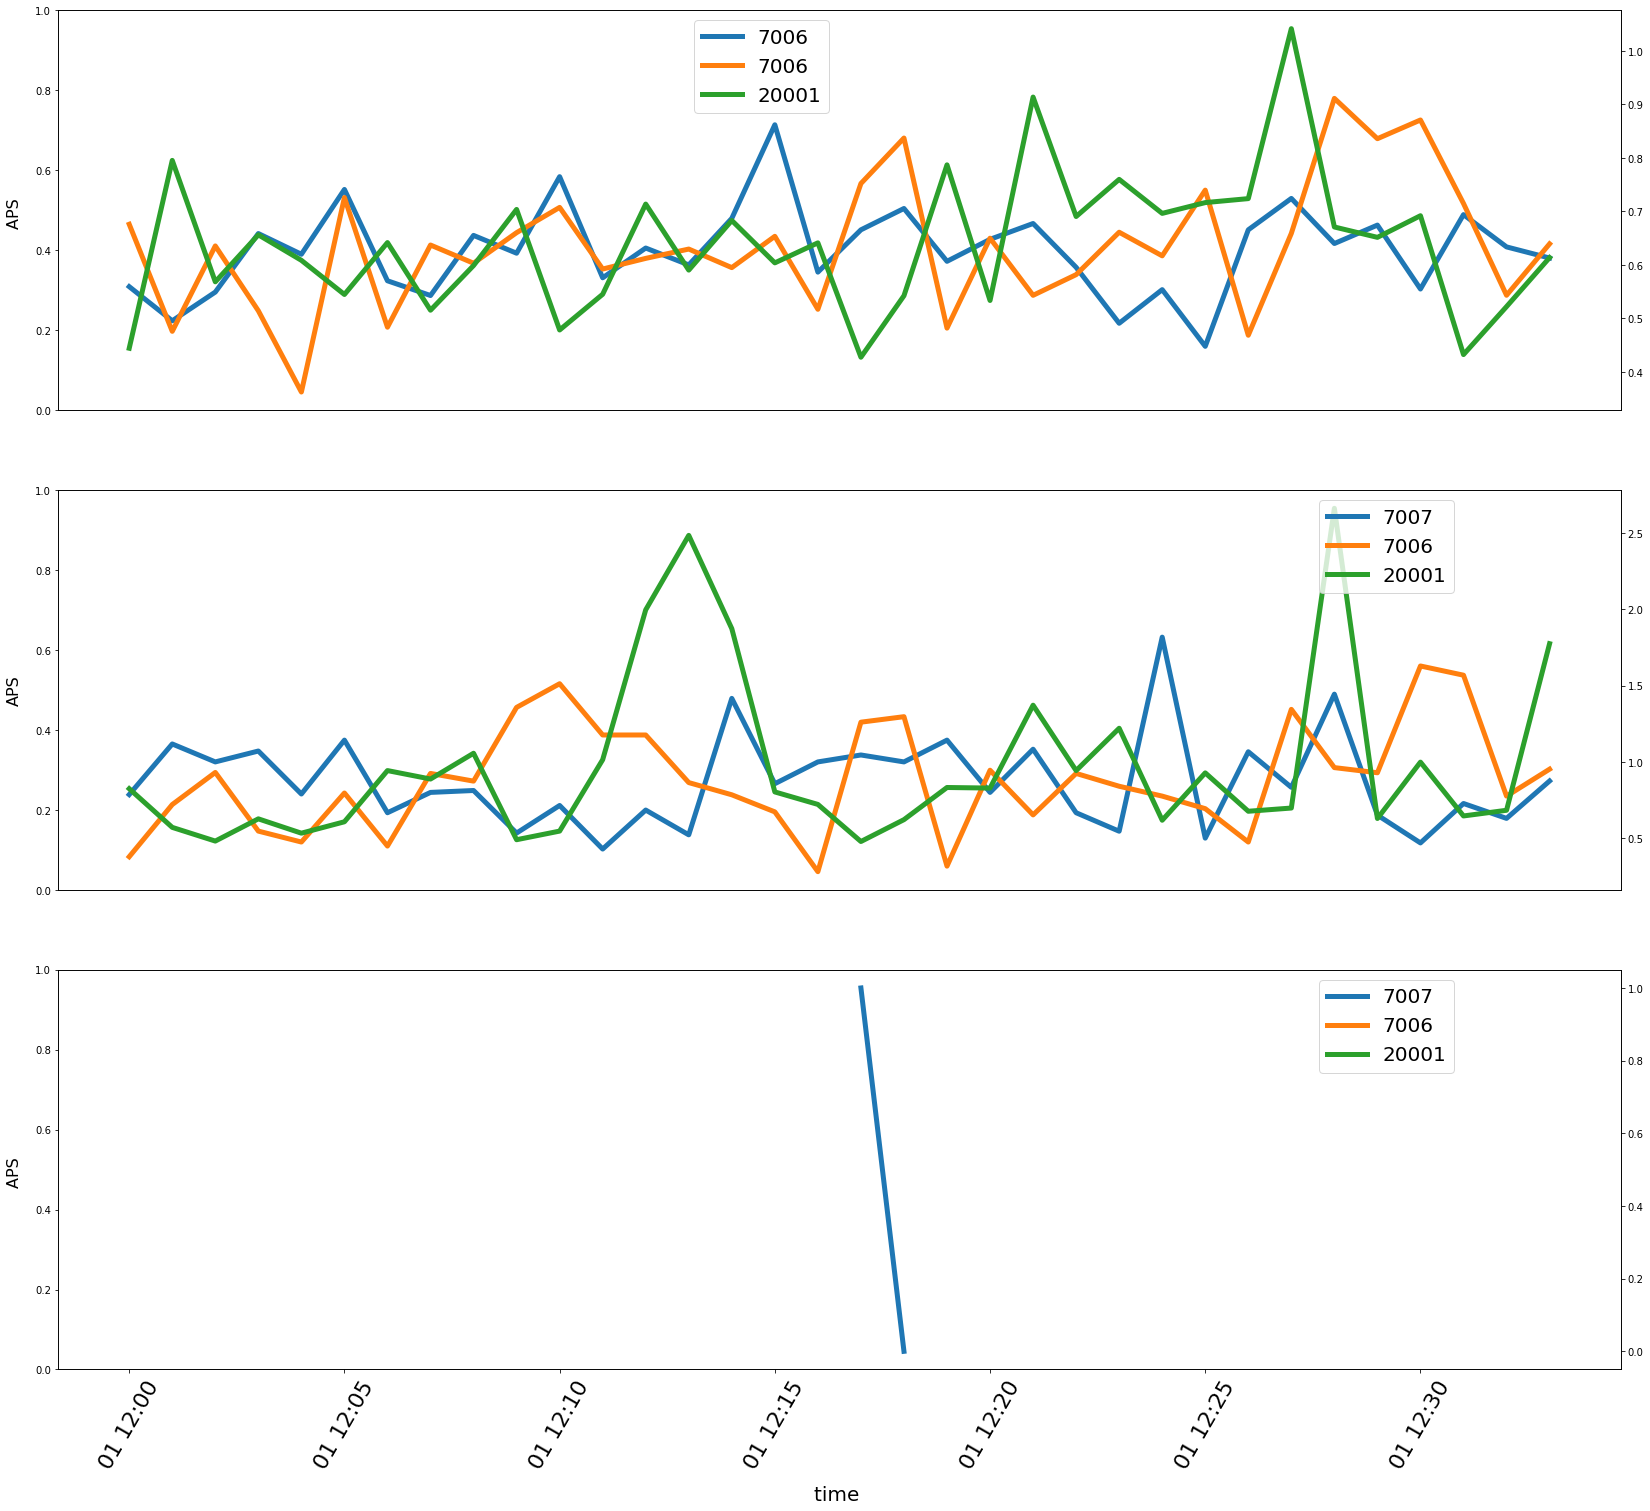

In [13]:

fig = plt.figure( figsize=(28, 25))

ax3 = fig.add_subplot(313)
ax1 = fig.add_subplot(311, sharex =ax3)
ax2 = fig.add_subplot(312, sharex =ax3)

ax1t = ax1.twinx()
ax2t = ax2.twinx()
ax3t = ax3.twinx()




ax1t.plot(df07.Date, df07['sr'], linewidth=5, label='7006')
ax1t.plot(df06.Date, df06['sr'], linewidth=5, label='7006')
ax1t.plot(df01.Date, df01['sr'], linewidth=5, label='20001')

ax2t.plot(df07.Date, df07['mr'], linewidth=5, label='7007')
ax2t.plot(df06.Date, df06['mr'], linewidth=5, label='7006')
ax2t.plot(df01.Date, df01['mr'], linewidth=5, label='20001')

ax3t.plot(df07.Date, df07['lr'], linewidth=5, label='7007')
ax3t.plot(df06.Date, df06['lr'], linewidth=5, label='7006')
ax3t.plot(df01.Date, df01['lr'], linewidth=5, label='20001')




x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)



ax3.set_xlabel('time ',color='k',fontsize=20,labelpad=13)
ax1.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('APS',color='k',fontsize=16,labelpad=13)
ax3.set_ylabel('APS ',color='k',fontsize=16,labelpad=13)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(60)
    label.set_fontsize(22)
    
ax1t.legend(bbox_to_anchor=(0.5, 1),loc='upper right', ncol=1, fontsize=20)
ax2t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)
ax3t.legend(bbox_to_anchor=(0.9, 1),loc='upper right', ncol=1, fontsize=20)




